In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

In [2]:
df=pd.read_csv("bestsellers.csv")

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [5]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [6]:
df.shape

(550, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.rename(columns={"User Rating": "User_Rating"}, inplace=True)

In [10]:
df['name_len'] = df['Name'].apply(lambda x: len(x) - x.count(" ")) #make a new variable without white spaces
punctuations = string.punctuation 
def count_punc(text):
    count = sum(1 for char in text if char in punctuations)
    return round(count / (len(text) - text.count(" ")) * 100, 3) 
df['punc%'] = df['Name'].apply(lambda x: count_punc(x))  #done mainly to identify fake datas since real data has less punctuations

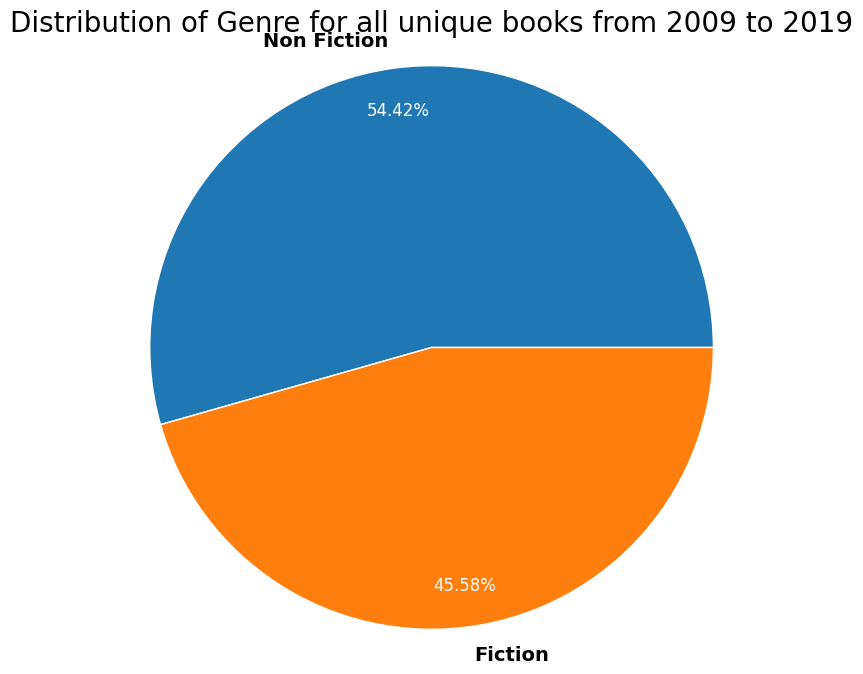

In [11]:
no_dup = df.drop_duplicates('Name') #remove duplicates from names
g_count = no_dup['Genre'].value_counts() #count the number of unique books belonging to each genre
fig, ax = plt.subplots(figsize=(8, 8))  #setting the size of the chart
#create a pie chart
wedges, texts, autotexts = ax.pie(g_count.values, labels=g_count.index, autopct='%.2f%%', pctdistance=0.85)
# Customize wedges and texts
for wedge in wedges:
    wedge.set_edgecolor('white')
    wedge.set_linewidth(1)

for text, autotext in zip(texts, autotexts):
    text.set_fontsize(14)
    text.set_fontweight('bold')
    autotext.set_fontsize(12)
    autotext.set_color('white')

# Title and aspect ratio
ax.set_title('Distribution of Genre for all unique books from 2009 to 2019', fontsize=20)
ax.axis('equal')
plt.show()

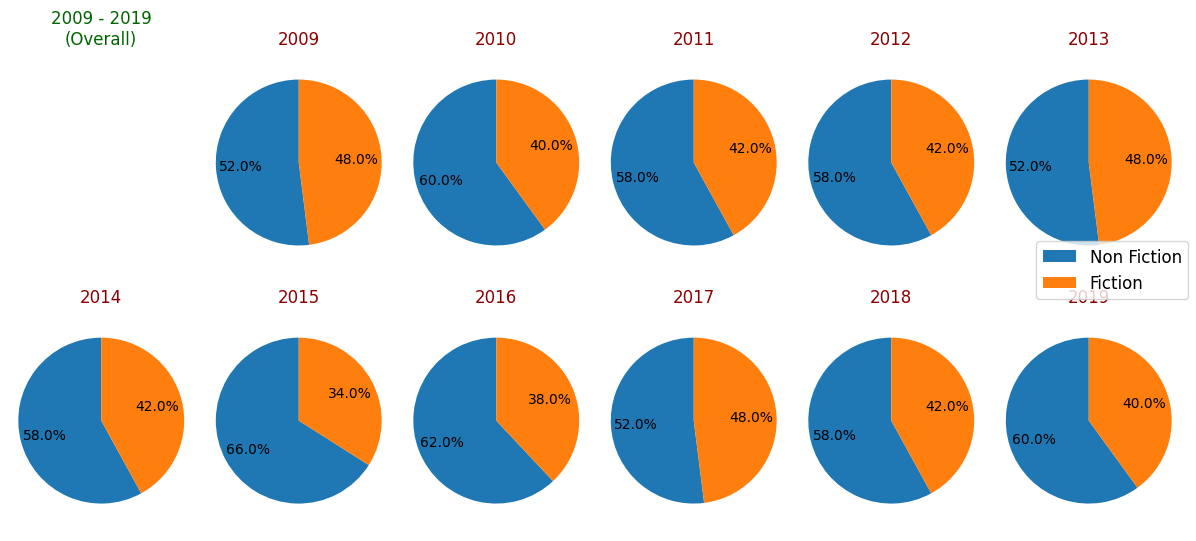

In [12]:
#to get pie charts in 2 rows
y1 = np.arange(2009, 2014)
y2 = np.arange(2014, 2020)
#count the number of books in each genre
g_count = df['Genre'].value_counts()
#2 rows, 6 columns and how much space
fig, ax = plt.subplots(2, 6, figsize=(12, 6))
#to make sure there is space between the charts
fig.subplots_adjust(hspace=0.4, wspace=0.3)
# Iterate over the subplots and create the pie charts
for i, year in enumerate(y1):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[0, i+1].pie(x=counts.values, labels=None, autopct='%.1f%%', startangle=90, pctdistance=0.7,radius=1.1)
    ax[0, i+1].set_title(year, color='darkred')
for i, year in enumerate(y2):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[1, i].pie(x=counts.values, labels=None, autopct='%.1f%%',
                 startangle=90, pctdistance=0.7, radius=1.1)
    ax[1, i].set_title(year, color='darkred')
# Set the title and font size for the overall chart
overall_title = ax[0, 0].set_title('2009 - 2019\n(Overall)', color='darkgreen')
# Create a legend for the genres
fig.legend(g_count.index, loc='center right', fontsize=12)
# Remove unnecessary spines and labels
for row in ax:
    for col in row:
        col.axis('equal') #to ensure that the chart is not ellipse
        col.spines['top'].set_visible(False)
        col.spines['right'].set_visible(False)
        col.spines['bottom'].set_visible(False)
        col.spines['left'].set_visible(False)
        col.set_xticks([])
        col.set_yticks([])
# Adjust the position of the subplots and title
fig.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_928\2234999945.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_928\2234999945.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')


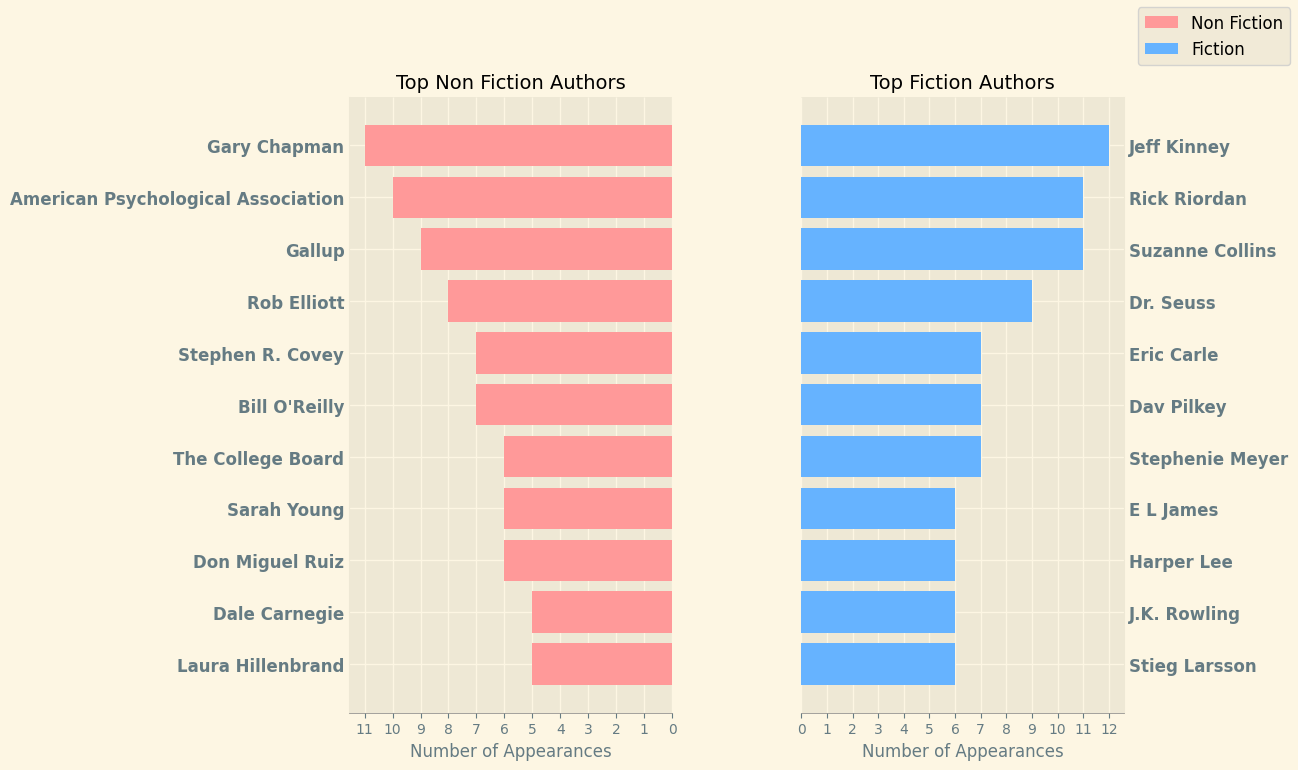

In [15]:
#group different datas by author, genre and .agg calculates how many books each author has in each genre. unstack reshapes the data to make it into columns, sorts the data and picks up top 11
best_nf_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Non Fiction'].sort_values(ascending=False)[:11]
best_f_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Fiction'].sort_values(ascending=False)[:11]

with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1, 2, figsize=(10, 8))
    # Create a custom color palette
    colors = ['#ff9999', '#66b3ff']
    # Plot the horizontal bar chart for Non Fiction Authors
    ax[0].barh(y=best_nf_authors.index, width=best_nf_authors.values, color=colors[0])
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(best_nf_authors.values) + 1))
    ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
    ax[0].set_xlabel('Number of Appearances', fontsize=12)
    ax[0].set_title('Top Non Fiction Authors', fontsize=14)
    # Plot the horizontal bar chart for Fiction Authors
    ax[1].barh(y=best_f_authors.index, width=best_f_authors.values, color=colors[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(best_f_authors.values) + 1))
    ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')
    ax[1].set_title('Top Fiction Authors', fontsize=14)
    ax[1].set_xlabel('Number of Appearances', fontsize=12)
    # Set the legend
    fig.legend(['Non Fiction', 'Fiction'], fontsize=12)
    # Remove spines
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[1].spines['top'].set_visible(False)
    # Adjust space between subplots
    plt.subplots_adjust(wspace=0.4)
    # Add a horizontal line at the bottom
    for a in ax:
        a.spines['bottom'].set_linewidth(0.5)
        a.spines['bottom'].set_color('gray')
        a.tick_params(axis='y', which='both', length=0)
    # Invert y-axis to show the highest count at the top
    ax[0].invert_yaxis()
    ax[1].invert_yaxis()
    plt.show()

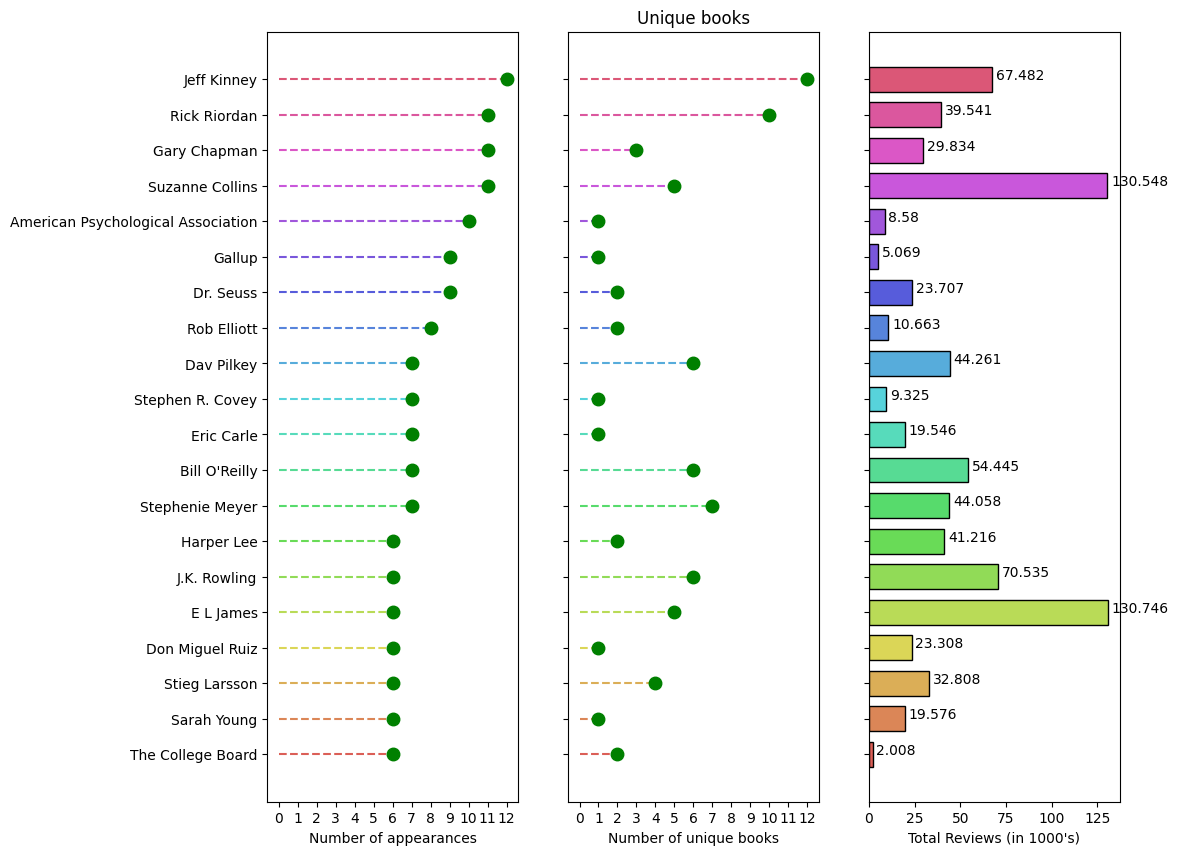

In [14]:
#pick 20 frequent authors
n_best = 20
top_authors = df.Author.value_counts().nlargest(n_best).sort_values(ascending=True)
#remove duplicates
no_dup = df.drop_duplicates('Name')
#make 3 charts, 1st- total apperances, 2nd is unique books, 3rd is total reviews
fig, ax = plt.subplots(1, 3, figsize=(11, 10), sharey=True)
color = sns.color_palette("hls", n_best)

ax[0].hlines(y=top_authors.index, xmin=0, xmax=top_authors.values, color=color, linestyles='dashed')
ax[0].plot(top_authors.values, top_authors.index, 'go', markersize=9)
ax[0].set_xlabel('Number of appearances')
ax[0].set_xticks(np.arange(top_authors.values.max() + 1))

book_count = []
total_reviews = []

for name, col in zip(top_authors.index, color):
    book_count.append(len(no_dup[no_dup.Author == name]['Name']))
    total_reviews.append(no_dup[no_dup.Author == name]['Reviews'].sum() / 1000)

ax[1].hlines(y=top_authors.index, xmin=0, xmax=book_count, color=color, linestyles='dashed')
ax[1].plot(book_count, top_authors.index, 'go', markersize=9)
ax[1].set_xlabel('Number of unique books')
ax[1].set_xticks(np.arange(max(book_count) + 1))
ax[1].set_title('Unique books')

ax[2].barh(y=top_authors.index, width=total_reviews, color=color, edgecolor='black', height=0.7)

for name, val in zip(top_authors.index, total_reviews):
    ax[2].text(val + 2, name, val)

ax[2].set_xlabel("Total Reviews (in 1000's)")
plt.show()